In [10]:
import pandas as pd
bank_df_full = pd.read_csv('bank_df_full.csv')
bank_df_full.head(10)

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,...,secondary,tertiary,unknown.1,cellular,telephone,unknown.2,failure,other,success,unknown.3
0,30,0,1787,0,0,19,10,79,1,-1,...,False,False,False,True,False,False,False,False,False,True
1,33,0,4789,1,1,11,5,220,1,339,...,True,False,False,True,False,False,True,False,False,False
2,35,0,1350,1,0,16,4,185,1,330,...,False,True,False,True,False,False,True,False,False,False
3,30,0,1476,1,1,3,6,199,4,-1,...,False,True,False,False,False,True,False,False,False,True
4,59,0,0,1,0,5,5,226,1,-1,...,True,False,False,False,False,True,False,False,False,True
5,35,0,747,0,0,23,2,141,2,176,...,False,True,False,True,False,False,True,False,False,False
6,36,0,307,1,0,14,5,341,1,330,...,False,True,False,True,False,False,False,True,False,False
7,39,0,147,1,0,6,5,151,2,-1,...,True,False,False,True,False,False,False,False,False,True
8,41,0,221,1,0,14,5,57,2,-1,...,False,True,False,False,False,True,False,False,False,True
9,43,0,-88,1,1,17,4,313,1,147,...,False,False,False,True,False,False,True,False,False,False


# KNN

In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X = bank_df_full.drop("y", axis = 1)
y = bank_df_full["y"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42, stratify = y)

X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

knn = KNeighborsClassifier(n_neighbors = 79)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

print(y_pred)
print(type(y_pred))

['no' 'no' 'no' ... 'no' 'no' 'no']
<class 'numpy.ndarray'>


In [ ]:
def best_knn_score(neighbors: int) -> str:
    """
    This returns the best knn score along with the number of neighbors. It loops
    through user's choice of number neighbors and gives the best one.
    """
    best_score = 0
    best_neighbors = 0 
    for n in range(1, neighbors):
        knn = KNeighborsClassifier(n_neighbors = n)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        score = knn.score(X_test, y_test)

        if (score > best_score):
            best_score = score
            best_neighbors = n
    
    result = f"The best knn score is {best_score} with {best_neighbors} neighbors."
    return result
best_knn_score(150)


'The best knn score is 0.8894620486366986 with 79 neighbors.'

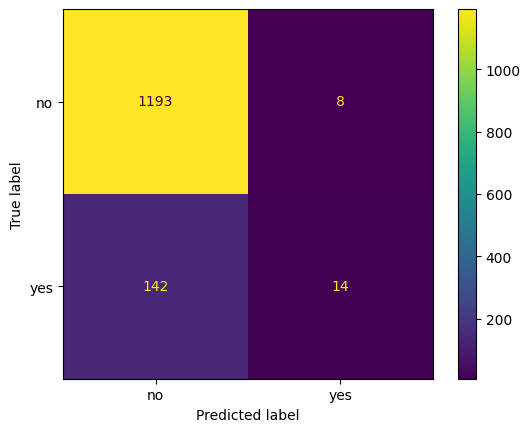

In [21]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

ConfusionMatrixDisplay.from_estimator(knn, X_test, y_test)

In [22]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          no       0.89      0.99      0.94      1201
         yes       0.64      0.09      0.16       156

    accuracy                           0.89      1357
   macro avg       0.76      0.54      0.55      1357
weighted avg       0.86      0.89      0.85      1357



# Logistic Regression